# Simulando pesquisas eleitorais com Python

### Esse código é o complemento do meu post sobre pesquisas eleitorais, ele pode ser lido [aqui](https://www.itsjohnsnotes.com/single-post/2018/10/27/Pesquisas-Eleitorais-Só-Precisam-de-2000-Pessoas-Pra-Acertar-Uma-Prova-Com-Programação)

In [168]:
import math
import random
import matplotlib.pyplot as plt
import scipy.stats
import statistics
import numpy as np
%matplotlib inline

### Primeiro, definimos o tamanho do eleitorado e o número de votos para os quais vamos simular e definimos a função 'pesquisa'

### Fixando alguns valores para facilitar a análise. Eles podem (e devem) ser alterados no futuro

In [188]:
eleitorado = 150000000
votacao = 60000000

In [4]:
def pesquisa(eleitorado, votacao, amostra):
    resultado = 0
    for i in range(amostra):
        chave = random.randint(0,eleitorado)
        if chave < votacao:
            resultado += 1
        else:
            resultado += 0
    return (resultado/amostra)

## Agora vamos simular uma pesquisa:

In [7]:
amostra = 2000
resultado_pesquisa = pesquisa(eleitorado, votacao, amostra) * eleitorado
erro = abs(((resultado_pesquisa)/votacao - 1) * 100)

print("resultado: {}, erro:{}".format(resultado_pesquisa, erro))

resultado: 63150000.0, erro:5.249999999999999


## Depois, definimos o número de simulações de pesquisa que queremos executar e definimos a função 'Simulacao'

### Essa função retorna o resultado médio e o erro médio depois de realizadas 'simulacoes' pesquisas.

In [91]:
def simulacao_formula_funcao(simulacoes, amostra):
    soma_resultado = 0
    soma_erro = 0
    for i in range(simulacoes):
        resultado = pesquisa(eleitorado, votacao, amostra)
        soma_resultado += resultado
        soma_erro += abs(((resultado)/votacao - 1) * 100)
    resultado_medio = soma_resultado/ simulacoes
    return soma_resultado

In [92]:
def simulacao_erro(simulacoes, amostra):
    soma_resultado = 0
    soma_erro = 0
    for i in range(simulacoes):
        resultado = pesquisa(eleitorado, votacao, amostra) * eleitorado
        soma_resultado += resultado
        soma_erro += abs(((resultado)/votacao - 1) * 100)
    erro_medio = soma_erro/ simulacoes
    return erro_medio

### Visualizando o desvio padrão e o histograma do erro com um tamanho de amostra.

In [173]:
def simulacao_histograma_simulacao(simulacoes, amostra):
    erro = []
    erro_normalizado = []
    mu = 0
    for i in range(simulacoes):
        erro_normalizado.append(0)
        erro.append(0)
        resultado = pesquisa(eleitorado, votacao, amostra) * eleitorado
        erro[i] = ((resultado)/votacao - 1) * 100
        erro_normalizado[i] = abs(((resultado)/votacao - 1) * 100)     
    sigma = np.std(erro_normalizado)
    mu = np.mean(erro_normalizado)
    
    print("Média dos erros: {}".format(mu))
    print("Desvio Padrão Simulação: {}".format(sigma))
    plt.xlabel("Erro")
    plt.ylabel("Frequência")
    plt.title("Amostra = {}".format(amostra))
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    #plot2 = plt.plot(x,scipy.stats.norm.pdf(x, mu, sigma))
    plot1 = plt.hist(erro, bins=10)
    plt.show()

Média dos erros: 2.20975
Desvio Padrão Simulação: 1.6180829513655963


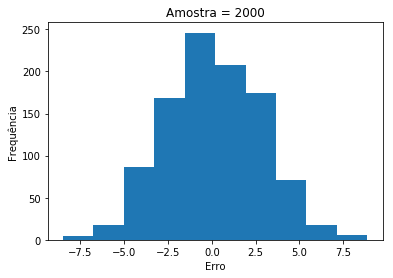

In [187]:
simulacao_histograma_simulacao(1000,2000)

### Fazendo isso para a distribuição normal

In [185]:
def simulacao_distribuicao_erro(simulacoes, amostra):
    erro = []
    erro_normalizado = []
    mu = 0
    for i in range(simulacoes):
        erro_normalizado.append(0)
        erro.append(0)
        resultado = pesquisa(eleitorado, votacao, amostra) * eleitorado
        erro[i] = ((resultado)/votacao - 1) * 100
        erro_normalizado[i] = abs(((resultado)/votacao - 1) * 100)     
    sigma = np.std(erro_normalizado)
    mu = np.mean(erro_normalizado)
    
    print("Média dos erros: {}".format(mu))
    print("Desvio Padrão Simulação: {}".format(sigma))
    plt.xlabel("Erro")
    plt.ylabel("Frequência")
    plt.title("Amostra = {}".format(amostra))
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plot2 = plt.plot(x,scipy.stats.norm.pdf(x, mu, sigma))
    plt.show()

Média dos erros: 2.1929999999999996
Desvio Padrão Simulação: 1.6660585223814917


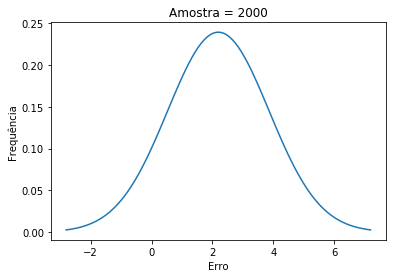

In [186]:
simulacao_distribuicao_erro(1000,2000)

### Aqui está a dúvida de como tratar essa distribuição no resultado final. O que deve ser mudado no código?

## Agora vamos visualizar a diferença do erro médio para tamanhos diferentes de amostra

### O código abaixo faz 450 simulações em diferentes tamanhos de amostra. A amostra varia de 10 em 10, partindo de 10 a 4500. No total, são feitas 450.000 'pesquisas'.

In [93]:
valores_amostra = []
resultado_medio = []
erro_medio = []
erro_formula = []
formula = []
for i in range(1,451):
    formula.append(0)
    erro_medio.append(0)
    valores_amostra.append(i*10)
for i in range(0,450):
    simulacao_formula = simulacao_formula_funcao(100, valores_amostra[i])
    formula[i] = (simulacao_formula * (1-simulacao_formula))/valores_amostra[i]
    erro_medio[i] = simulacao_erro(100, valores_amostra[i])
print("Finalizado")

Finalizado


In [94]:
erro_formula = []
for i in range(1,451):
    erro_formula.append(0)
for i in range(0,450):
    erro_formula[i] = math.sqrt(abs(formula[i]))


## Vizualizando a variação do erro quando se varia as amostras.

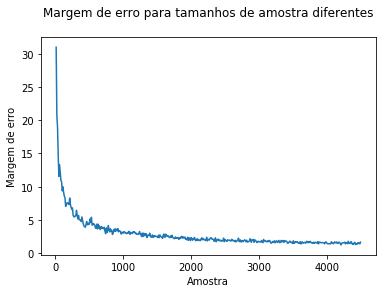

In [95]:
plt.xlabel("Amostra")
plt.ylabel("Margem de erro")
plt.title("Margem de erro para tamanhos de amostra diferentes\n")
line2, = plt.plot(valores_amostra, erro_medio)
plt.show()

### Podemos concluir, então, que o erro não excede 4.06 pontos percentuais para amostras menores que 4500.

### Visualizando a correlação entre a fórmula para a margem de erro e o gráfico gerado pela simulação

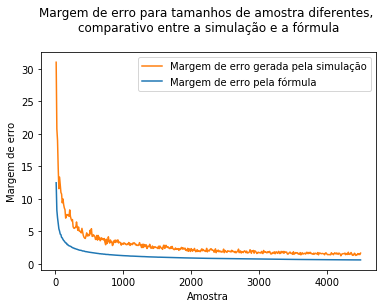

In [96]:
plt.xlabel("Amostra")
plt.ylabel("Margem de erro")
plt.title("Margem de erro para tamanhos de amostra diferentes, \ncomparativo entre a simulação e a fórmula\n")

line1, = plt.plot(valores_amostra, erro_formula, label="Margem de erro pela fórmula")
line2, = plt.plot(valores_amostra, erro_medio, label="Margem de erro gerada pela simulação")
plt.legend(handles=[line2, line1])
plt.show()

### Código elaborado por João Pedro Oliveira. 2018